# Week 46

In [2]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

## Extinction coefficient of human myoglobin

The protein of human myoglobin is given below

In [3]:
sequence = """GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGA
TVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNY
KELGFQG"""

We want to calculate the *extinction coefficient* of this protein, we
have seen that this can be calculated using the formula

<span id="eq-extinction">$$
\epsilon(280 \mathrm{nm}) = N_{Trp} A + N_{Tyr} B + N_{Cys} C 
 \qquad(1)$$</span>

Where $N_{Trp}$ is the number of Tryptophan in the protein (and likewise
for the other two terms), and the three constants $A$, $B$ and $C$ are
given as

$$
A = 5500 \ \mathrm{M^{−1} cm^{−1}}
$$ $$
B = 1490 \ \mathrm{M^{−1} cm^{−1}}
$$ $$
C = 125 \ \mathrm{M^{−1} cm^{−1}}
$$

In order to calculate the formula we need to know the count of the
relevant residues, we can use Python to get that - for example we can
count the number of Tryptophan like so;

In [4]:
N_trp = sequence.count("W")

### (a) Determine the number of residues

In the cell below find the number of residues

In [6]:
N_tyr = ... # Your code here
... # Your code here for the N_cys.

In [7]:
print(f"{N_trp = }")
print(f"{N_tyr = }")
print(f"{N_cys = }")

N_trp = 2
N_tyr = 2
N_cys = 1

### (b) Calculate the extinction coefficient

Use equation
(<a href="#eq-extinction" class="quarto-xref">Equation 1</a>) to
calculate the extinction coefficient of human myoglobin.

In [8]:
A = 5500
B = 1490
C = 125

In [9]:
epsilon = ... # Erstat ... med din kode.
print(epsilon)

What are the units of this value?

### (c) Compare residue count to ProtParam

ProtParam is an online tool that calculates various physical and
chemical parameters from a given protein sequence and is used worldwide
in research laboratories.

<figure>
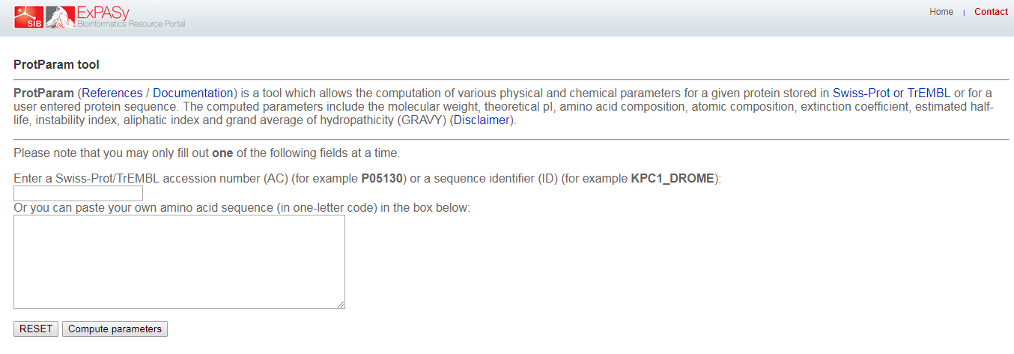
<figcaption aria-hidden="true">Protpram tool input page.</figcaption>
</figure>

Go to ProtPram at this link: <https://web.expasy.org/protparam/> and
paste the sequence and click **Compute Parameters**. You should then see
the calculated parameters, similar to in the image below

<figure>
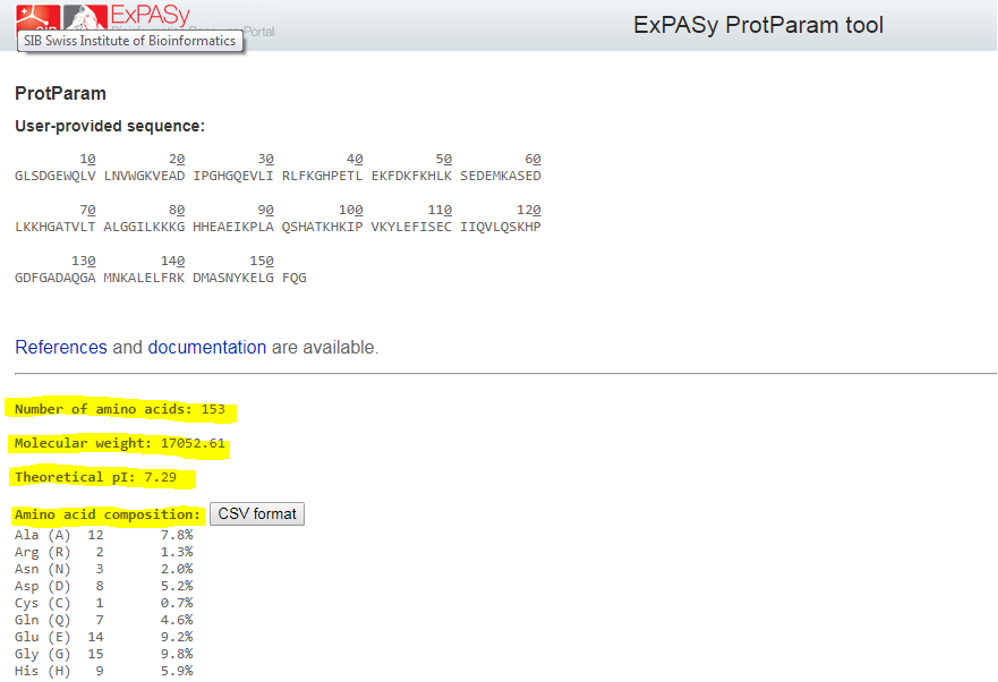
<figcaption aria-hidden="true">Protpram tool calculated
properties.</figcaption>
</figure>

On the output page you will see the number of residues, does that match
your calculation?

### (d) ProtPram extinction coefficient

Scrolling further down you will find that ProtParam also gives the
extinction coefficient for the protein. As the absorbance of Cys
residues varies slightly dependent on whether disulfide bridges
(cystines) are present or not, ProtParam list the extinction coefficient
in both reduced and oxidized states of the Cys residues.

Consider the following questions

-   Why are the extinction coefficients of myoglobin the same whether
    cystines are formed or not?

-   Does the extinction coefficient computed in ProtParam match the
    value you have calculated?

### (e) Calculate the absorbance

Using the extinction coefficient and the molecular weight given by
ProtParam, calculate the absorbance at 280 nm of a myoglobin solution at
a concentration of 1 mg/mL in a cuvette with a light path of 1 cm.

In [12]:
molecular_weight = ... # Find the value on ProtPram (It has units of g/mol)
path_length = ... # Set the value of the path length
concentration = ... # Set the value of the concentraiton.

Remember to convert the concentration to $\mathrm{mol/L}$.

In [13]:
A280 = ...
print(A280)

This value is what is known as the A280(0.1%) of a protein, i.e. the
absorbance of a given protein at a concentration of 0.1% weight/volume
(= 1 g/L = 1 mg/mL).

### (f) Compare the absorbance to Protpram

Does the number reported by ProtParam correspond to the number you just
calculated in (e)?